<a href="https://colab.research.google.com/github/brenvilla/Valores_Atipicos/blob/main/Act_3_2_ValoresAtipicosDataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 3.2 (Valores Atípicos por Dataframe)**

Brenda Villa Campos A01732238

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [141]:
#Carga desde un archivo .xlsx sin indice
data2020= pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2020',skiprows=[0,1,2,3,4])
data2021= pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2021',skiprows=[0,1,2])
data2022= pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2022',skiprows=[0,1,2])
data2023= pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name = '2023',skiprows=[0,1,2])

### **DATAFRAME 1: GASTOS Y COSTOS 2020**

In [36]:
data2020.head(3)

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.0,2248.28,0.0,0.0,2248.28,16300.0,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.0,78.40,0.0,0.0,568.40,568.4,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.0,31.20,0.0,0.0,226.20,226.2,I,Vigente,NaN,0.00


In [37]:
#Verificamos información del DataFrame
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [38]:
#Corroboramos valores nulos
valores_nulos=data2020.isnull().sum()
valores_nulos

FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

**ELIMINACIÓN DE VALORES NULOS EN DATAFRAME**

In [39]:
#Reemplazamos valores nulos del dataframe con "bfill"
data2020 =data2020.fillna(method="bfill") 

In [40]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2020.isnull().sum()
valores_nulos

FECHA             0
FOLIO             0
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO             0
DESCRIPCION       0
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2898
Columna1          0
dtype: int64

In [42]:
#Reemplazamos valores nulos de la columna POLIZA con 'sin datos'
data2020["POLIZA"]=data2020["POLIZA"].fillna('sin datos')

In [43]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2020.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
Columna1       0
dtype: int64

<Figure size 1500x800 with 0 Axes>

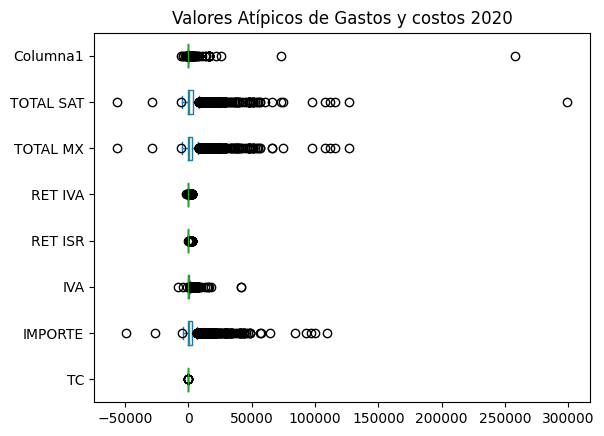

In [44]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2020.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2020")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [45]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data2020
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Columna1     14626.999268
FECHA                 NaT
IMPORTE      25212.063736
IVA           5206.165867
RET ISR        667.271992
RET IVA        958.239955
TC               4.239688
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
dtype: object
Limite inferior permitido Columna1    -14171.411134
FECHA                 NaT
IMPORTE     -18928.758033
IVA          -4129.109781
RET ISR       -627.750813
RET IVA       -839.215179
TC               -2.12987
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
dtype: object


<ipython-input-45-1aa56aba21ba>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-45-1aa56aba21ba>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-45-1aa56aba21ba>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-45-1aa56aba21ba>:4: FutureWarning: DataFrame.mean and DataFrame.m

In [46]:
#Encontramos Ouliers del Dataframe
outliers= data2020[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-46-862d790789fe>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= data2020[(y>Limite_Superior)|(y<Limite_Inferior)]


,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data= data2020[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

<ipython-input-47-e5299b7301a4>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data= data2020[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,NaN,NaN,NaN,14051.72
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN,0.00
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,195.00,31.20,0.0,0.0,226.20,226.20,NaN,NaN,NaN,0.00
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,NaN,NaN,NaN,0.00
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.79,20.21,0.0,0.0,150.00,150.00,NaN,NaN,NaN,0.00
3338,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,NaN,NaN,NaN,0.00
3339,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,163.79,26.21,0.0,0.0,190.00,190.00,NaN,NaN,NaN,0.00
3340,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.00


In [48]:
#Eliminamos columnas innecesarias
data2= data.drop(['FECHA'], axis=1)
data2

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,NaN,NaN,NaN,14051.72
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,195.00,31.20,0.0,0.0,226.20,226.20,NaN,NaN,NaN,0.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,NaN,NaN,NaN,0.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.79,20.21,0.0,0.0,150.00,150.00,NaN,NaN,NaN,0.00
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,NaN,NaN,NaN,0.00
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,163.79,26.21,0.0,0.0,190.00,190.00,NaN,NaN,NaN,0.00
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.00


In [49]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

FOLIO          3342
UUID           3342
RFC            3342
PROVEEDOR      3342
TIPO GASTO     3342
GASTO          3342
DESCRIPCION    3342
TC                9
IMPORTE          66
IVA              46
RET ISR          21
RET IVA          74
TOTAL MX         65
TOTAL SAT        45
TIPO           3342
STATUS         3342
POLIZA         3342
Columna1         15
dtype: int64

In [50]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,NaN,NaN,NaN,14051.72
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,195.00,31.20,0.0,0.0,226.20,226.20,NaN,NaN,NaN,0.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,NaN,NaN,NaN,0.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.79,20.21,0.0,0.0,150.00,150.00,NaN,NaN,NaN,0.00
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,NaN,NaN,NaN,0.00
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,163.79,26.21,0.0,0.0,190.00,190.00,NaN,NaN,NaN,0.00
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.00


In [51]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

FOLIO          3342
UUID           3342
RFC            3342
PROVEEDOR      3342
TIPO GASTO     3342
GASTO          3342
DESCRIPCION    3342
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO           3342
STATUS         3342
POLIZA         3342
Columna1          0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [52]:
#Eliminamos columnas innecesarias
data1=data2020.copy()
data1= data1.drop(['FECHA'], axis=1)

In [53]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC              1.00000
IMPORTE      6976.21375
IVA          1170.77250
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     7983.17750
TOTAL SAT    8269.28375
Columna1        0.00000
dtype: float64
Limite inferior permitido TC              1.00000
IMPORTE     -4160.35625
IVA          -687.92750
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4783.14250
TOTAL SAT   -4832.96625
Columna1        0.00000
dtype: float64


<ipython-input-53-6a81c83408ef>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-53-6a81c83408ef>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [54]:
#Encontramos Outliers del Dataframe
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

<ipython-input-54-01dbba553b9b>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2248.28,NaN,NaN,NaN,16300.00,NaN,NaN,NaN,14051.72
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10694.25,1711.08,NaN,NaN,12405.33,12405.33,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5131.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#Obtenemos datos limpios del Dataframe
data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

<ipython-input-55-38d163ec8a02>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,NaN,0.0,0.0,2248.28,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,195.00,31.20,0.0,0.0,226.20,226.20,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.79,20.21,0.0,0.0,150.00,150.00,NaN,NaN,NaN,0.0
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,NaN,NaN,NaN,0.0
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,163.79,26.21,0.0,0.0,190.00,190.00,NaN,NaN,NaN,0.0
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.0


In [56]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_iqr.isnull().sum()
valores_nulos

FOLIO          3342
UUID           3342
RFC            3342
PROVEEDOR      3342
TIPO GASTO     3342
GASTO          3342
DESCRIPCION    3342
TC                9
IMPORTE         424
IVA             411
RET ISR          45
RET IVA         253
TOTAL MX        420
TOTAL SAT       426
TIPO           3342
STATUS         3342
POLIZA         3342
Columna1        240
dtype: int64

In [57]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data2_iqr=data_iqr.copy()
data2_iqr=data2_iqr.fillna(round(data_iqr.mean(),1))
data2_iqr

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,187.40,0.0,0.0,2248.28,1333.00,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,195.00,31.20,0.0,0.0,226.20,226.20,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1093.80,187.40,0.0,0.0,1239.10,1333.00,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,187.40,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.79,20.21,0.0,0.0,150.00,150.00,NaN,NaN,NaN,0.0
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,NaN,NaN,NaN,0.0
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,163.79,26.21,0.0,0.0,190.00,190.00,NaN,NaN,NaN,0.0
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.0


In [58]:
# Unimos la columna FECHA con el dataframe
fecha=data2020['FECHA']
Datos_limpios_2020 = pd.concat([fecha, data2_iqr], axis=1)
Datos_limpios_2020

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,187.40,0.0,0.0,2248.28,1333.00,NaN,NaN,NaN,0.0
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN,0.0
2,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,195.00,31.20,0.0,0.0,226.20,226.20,NaN,NaN,NaN,0.0
3,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1093.80,187.40,0.0,0.0,1239.10,1333.00,NaN,NaN,NaN,0.0
4,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,187.40,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.79,20.21,0.0,0.0,150.00,150.00,NaN,NaN,NaN,0.0
3338,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,NaN,NaN,NaN,0.0
3339,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,163.79,26.21,0.0,0.0,190.00,190.00,NaN,NaN,NaN,0.0
3340,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0.0


In [59]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios_2020.isnull().sum()
valores_nulos

FECHA             0
FOLIO          3342
UUID           3342
RFC            3342
PROVEEDOR      3342
TIPO GASTO     3342
GASTO          3342
DESCRIPCION    3342
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO           3342
STATUS         3342
POLIZA         3342
Columna1          0
dtype: int64

<Figure size 1500x800 with 0 Axes>

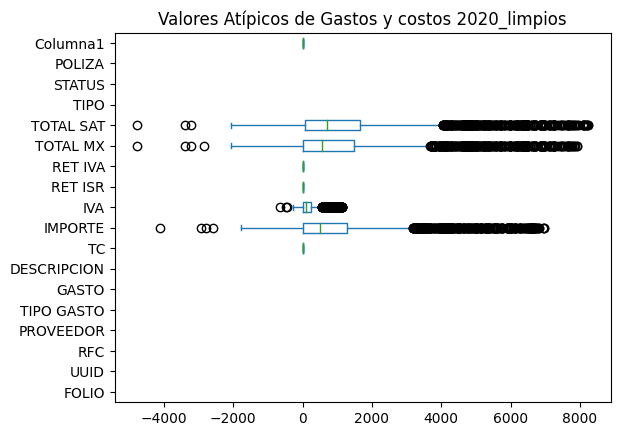

In [167]:
#Diagrama de caja o bigote de cada columna del dataframe limpio
fig = plt.figure(figsize =(15, 8))
Datos_limpios_2020.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2020_limpios")
plt.show()

In [60]:
#Convertir DataFrame a CSV
Datos_limpios_2020.to_csv("Gastos_Costos_2020_limpios.csv")

In [61]:
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("Gastos_Costos_2020_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **DATAFRAME 2: GASTOS Y COSTOS 2021**

In [62]:
data2021.head(3)

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.4,568.4,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.2,400.2,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,I,Vigente,0


In [63]:
#Verificamos información del DataFrame
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [64]:
#Corroboramos valores nulos
valores_nulos=data2021.isnull().sum()
valores_nulos

FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64

**ELIMINACIÓN DE VALORES NULOS EN DATAFRAME**

In [65]:
#Reemplazamos valores nulos del dataframe con "bfill"
data2021 =data2021.fillna(method="bfill") 

In [66]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2021.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         6
dtype: int64

In [67]:
#Reemplazamos valores nulos de la columna POLIZA con 'sin datos'
data2021["POLIZA"]=data2021["POLIZA"].fillna('sin datos')

In [68]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2021.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

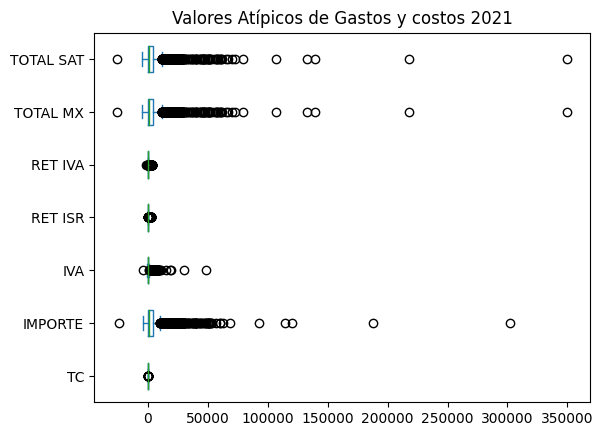

In [69]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2021.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2021")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [70]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data2021
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FECHA                 NaT
IMPORTE       36154.56982
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TC               6.286851
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: object
Limite inferior permitido FECHA                 NaT
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TC              -3.981398
TOTAL MX    -31176.694132
TOTAL SAT    -31129.50341
dtype: object


<ipython-input-70-2c0e56b61cf1>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-70-2c0e56b61cf1>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-70-2c0e56b61cf1>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-70-2c0e56b61cf1>:4: FutureWarning: DataFrame.mean and DataFrame.m

In [71]:
#Encontramos Ouliers del Dataframe
outliers= data2021[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-71-00a1c5199dcd>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= data2021[(y>Limite_Superior)|(y<Limite_Inferior)]


,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data= data2021[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

<ipython-input-72-0fdbbe0801b0>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data= data2021[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,345.00,55.20,0.0,0.0,400.20,400.20,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3031,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3032,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,NaN,NaN,NaN
3033,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN


In [73]:
#Eliminamos columnas innecesarias
data2= data.drop(['FECHA'], axis=1)
data2

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,345.00,55.20,0.0,0.0,400.20,400.20,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN


In [74]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

FOLIO          3035
UUID           3035
RFC            3035
PROVEEDOR      3035
TIPO GASTO     3035
DESCRIPCION    3035
MP             3035
TC               24
IMPORTE          43
IVA              38
RET ISR          32
RET IVA          81
TOTAL MX         40
TOTAL SAT        40
TIPO           3035
STATUS         3035
POLIZA         3035
dtype: int64

In [75]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.40,568.40,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,345.00,55.20,0.0,0.0,400.20,400.20,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN


In [76]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

FOLIO          3035
UUID           3035
RFC            3035
PROVEEDOR      3035
TIPO GASTO     3035
DESCRIPCION    3035
MP             3035
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO           3035
STATUS         3035
POLIZA         3035
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [77]:
#Eliminamos columnas innecesarias
data1=data2021.copy()
data1= data1.drop(['FECHA'], axis=1)

In [78]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.0000
IMPORTE      10127.7125
IVA           1381.4750
RET ISR          0.0000
RET IVA          0.0000
TOTAL MX     11580.2750
TOTAL SAT    11456.0225
dtype: float64
Limite inferior permitido TC              1.0000
IMPORTE     -6076.6275
IVA          -828.8850
RET ISR         0.0000
RET IVA         0.0000
TOTAL MX    -6948.1650
TOTAL SAT   -6818.3175
dtype: float64


<ipython-input-78-6a81c83408ef>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-78-6a81c83408ef>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [79]:
#Encontramos Outliers del Dataframe
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

<ipython-input-79-01dbba553b9b>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22826.46,NaN,NaN,NaN,23532.04,23532.04,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#Obtenemos datos limpios del Dataframe
data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

<ipython-input-80-38d163ec8a02>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.4,568.4,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,345.00,55.20,0.0,0.0,400.2,400.2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,705.58,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [81]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_iqr.isnull().sum()
valores_nulos

FOLIO          3035
UUID           3035
RFC            3035
PROVEEDOR      3035
TIPO GASTO     3035
DESCRIPCION    3035
MP             3035
TC               24
IMPORTE         336
IVA             342
RET ISR          56
RET IVA         212
TOTAL MX        347
TOTAL SAT       351
TIPO           3035
STATUS         3035
POLIZA         3035
dtype: int64

In [82]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data2_iqr=data_iqr.copy()
data2_iqr=data2_iqr.fillna(round(data_iqr.mean(),1))
data2_iqr

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.4,568.4,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,345.00,55.20,0.0,0.0,400.2,400.2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1699.50,705.58,0.0,0.0,1903.4,1910.9,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [83]:
# Unimos la columna FECHA con el dataframe
fecha=data2021['FECHA']
Datos_limpios_2021 = pd.concat([fecha, data2_iqr], axis=1)
Datos_limpios_2021

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,490.00,78.40,0.0,0.0,568.4,568.4,NaN,NaN,NaN
1,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,345.00,55.20,0.0,0.0,400.2,400.2,NaN,NaN,NaN
2,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,NaN,NaN,NaN
3,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,NaN,NaN,NaN
4,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3031,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3032,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1699.50,705.58,0.0,0.0,1903.4,1910.9,NaN,NaN,NaN
3033,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [84]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios_2021.isnull().sum()
valores_nulos

FECHA             0
FOLIO          3035
UUID           3035
RFC            3035
PROVEEDOR      3035
TIPO GASTO     3035
DESCRIPCION    3035
MP             3035
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO           3035
STATUS         3035
POLIZA         3035
dtype: int64

<Figure size 1500x800 with 0 Axes>

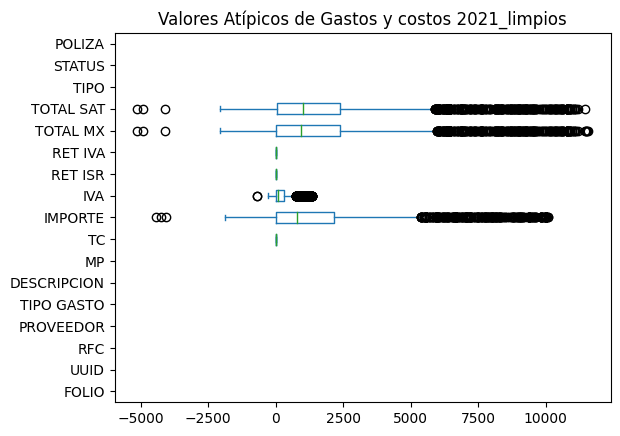

In [168]:
#Diagrama de caja o bigote de cada columna del dataframe limpio
fig = plt.figure(figsize =(15, 8))
Datos_limpios_2021.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2021_limpios")
plt.show()

In [85]:
#Convertir DataFrame a CSV
Datos_limpios_2021.to_csv("Gastos_Costos_2021_limpios.csv")

In [86]:
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("Gastos_Costos_2021_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **DATAFRAME 3: GASTOS Y COSTOS 2022**

In [87]:
data2022.head(3)

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,I,Vigente,NaN


In [88]:
#Verificamos información del DataFrame
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

In [89]:
#Corroboramos valores nulos
valores_nulos=data2022.isnull().sum()
valores_nulos

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64

**ELIMINACIÓN DE VALORES NULOS EN DATAFRAME**

In [90]:
#Reemplazamos valores nulos del dataframe con "bfill"
data2022 =data2022.fillna(method="bfill") 

In [91]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2022.isnull().sum()
valores_nulos

Fecha             0
Folio             0
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP                3
TC                3
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza           12
dtype: int64

In [96]:
#Reemplazamos valores nulos de la columna POLIZA con 'sin datos'
data2022["Poliza"]=data2022["Poliza"].fillna('sin datos')
data2022['Otros']=data2022['Otros'].fillna(0)
data2022['MP'] =data2022['MP'].fillna(method="ffill")
data2022['TC'] =data2022['TC'].fillna(method="ffill") 

In [97]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2022.isnull().sum()
valores_nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

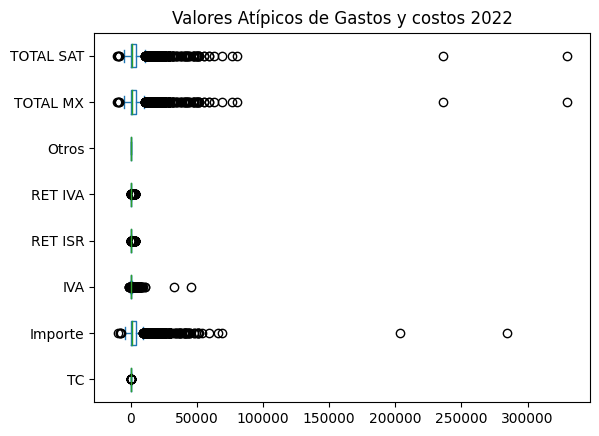

In [98]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2022.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2022")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [99]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data2022
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Fecha                 NaT
IVA           5048.646001
Importe      34975.501132
Otros                 0.0
RET ISR        977.619941
RET IVA       1046.847384
TC               6.217037
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: object
Limite inferior permitido Fecha                 NaT
IVA          -4069.819702
Importe     -26990.441616
Otros                 0.0
RET ISR       -902.558225
RET IVA       -964.592475
TC               -3.91836
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: object


<ipython-input-99-0255f8758a37>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-99-0255f8758a37>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-99-0255f8758a37>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-99-0255f8758a37>:4: FutureWarning: DataFrame.mean and DataFrame.m

In [100]:
#Encontramos Ouliers del Dataframe
outliers= data2022[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-100-6cc391e7bbd2>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= data2022[(y>Limite_Superior)|(y<Limite_Inferior)]


,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2574,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data= data2022[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

<ipython-input-101-9e61ca68b7fd>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data= data2022[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2573,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17310.30,516.32,0.0,0.0,0.0,17826.62,17826.62,NaN,NaN,NaN
2574,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2575,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN


In [103]:
#Eliminamos columnas innecesarias
data2= data.drop(['Fecha'], axis=1)
data2

,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17310.30,516.32,0.0,0.0,0.0,17826.62,17826.62,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN


In [104]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

Folio          2577
UUID           2577
RFC            2577
Proveedor      2577
TIPO GASTO     2577
Descripción    2577
MP             2577
TC               20
Importe          36
IVA              31
RET ISR          32
RET IVA          32
Otros             0
TOTAL MX         36
TOTAL SAT        36
Tipo           2577
Status         2577
Poliza         2577
dtype: int64

In [105]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,17310.30,516.32,0.0,0.0,0.0,17826.62,17826.62,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN


In [106]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

Folio          2577
UUID           2577
RFC            2577
Proveedor      2577
TIPO GASTO     2577
Descripción    2577
MP             2577
TC                0
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros             0
TOTAL MX          0
TOTAL SAT         0
Tipo           2577
Status         2577
Poliza         2577
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [107]:
#Eliminamos columnas innecesarias
data1=data2022.copy()
data1= data1.drop(['Fecha'], axis=1)

In [108]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.000
Importe       9058.900
IVA           1031.150
RET ISR          0.000
RET IVA          0.000
Otros            0.000
TOTAL MX     10374.700
TOTAL SAT    10485.475
dtype: float64
Limite inferior permitido TC              1.000
Importe     -5435.340
IVA          -618.690
RET ISR         0.000
RET IVA         0.000
Otros           0.000
TOTAL MX    -6224.820
TOTAL SAT   -6291.285
dtype: float64


<ipython-input-108-6a81c83408ef>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-108-6a81c83408ef>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [109]:
#Encontramos Outliers del Dataframe
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

<ipython-input-109-01dbba553b9b>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17310.3,NaN,NaN,NaN,NaN,17826.62,17826.62,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#Obtenemos datos limpios del Dataframe
data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

<ipython-input-110-38d163ec8a02>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,516.32,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [111]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_iqr.isnull().sum()
valores_nulos

Folio          2577
UUID           2577
RFC            2577
Proveedor      2577
TIPO GASTO     2577
Descripción    2577
MP             2577
TC               20
Importe         305
IVA             303
RET ISR          71
RET IVA          70
Otros             0
TOTAL MX        291
TOTAL SAT       288
Tipo           2577
Status         2577
Poliza         2577
dtype: int64

In [112]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data2_iqr=data_iqr.copy()
data2_iqr=data2_iqr.fillna(round(data_iqr.mean(),1))
data2_iqr

,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1449.20,516.32,0.0,0.0,0.0,1711.5,1782.0,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [113]:
# Unimos la columna FECHA con el dataframe
fecha=data2022['Fecha']
Datos_limpios_2022 = pd.concat([fecha, data2_iqr], axis=1)
Datos_limpios_2022

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6,NaN,NaN,NaN
1,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3,NaN,NaN,NaN
2,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2573,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1449.20,516.32,0.0,0.0,0.0,1711.5,1782.0,NaN,NaN,NaN
2574,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2575,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [114]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios_2022.isnull().sum()
valores_nulos

Fecha             0
Folio          2577
UUID           2577
RFC            2577
Proveedor      2577
TIPO GASTO     2577
Descripción    2577
MP             2577
TC                0
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros             0
TOTAL MX          0
TOTAL SAT         0
Tipo           2577
Status         2577
Poliza         2577
dtype: int64

<Figure size 1500x800 with 0 Axes>

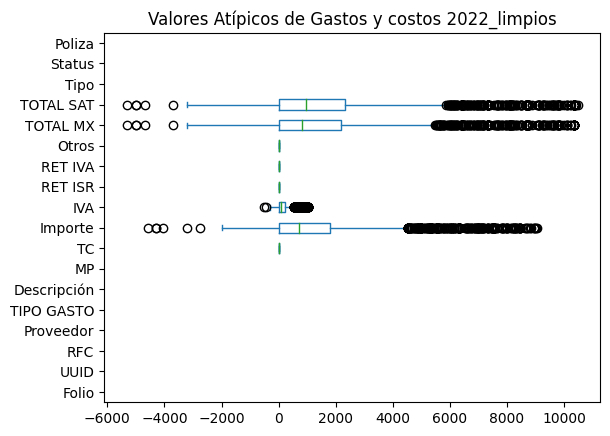

In [169]:
#Diagrama de caja o bigote de cada columna del dataframe limpio
fig = plt.figure(figsize =(15, 8))
Datos_limpios_2022.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2022_limpios")
plt.show()

In [115]:
#Convertir DataFrame a CSV
Datos_limpios_2022.to_csv("Gastos_Costos_2022_limpios.csv")

In [116]:
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("Gastos_Costos_2022_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **DATAFRAME 4: GASTOS Y COSTOS 2023**

In [142]:
data2023.head(3)

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE01-ENE23


In [143]:
#Verificamos información del DataFrame
data2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [144]:
#Corroboramos valores nulos
valores_nulos=data2023.isnull().sum()
valores_nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

**ELIMINACIÓN DE VALORES NULOS EN DATAFRAME**

In [145]:
#Reemplazamos valores nulos del dataframe con "bfill"
data2023 =data2023.fillna(method="bfill") 

In [146]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2023.isnull().sum()
valores_nulos

Fecha            0
Folio            0
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP               1
FP               1
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza           8
dtype: int64

In [147]:
#Reemplazamos valores nulos de la columna POLIZA con 'sin datos'
data2023["Poliza"]=data2023["Poliza"].fillna('sin datos')
data2023['Otros']=data2023['Otros'].fillna(0)
data2023['MP'] =data2023['MP'].fillna(method="ffill")
data2023['FP'] =data2023['FP'].fillna(method="ffill") 

In [148]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2023.isnull().sum()
valores_nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

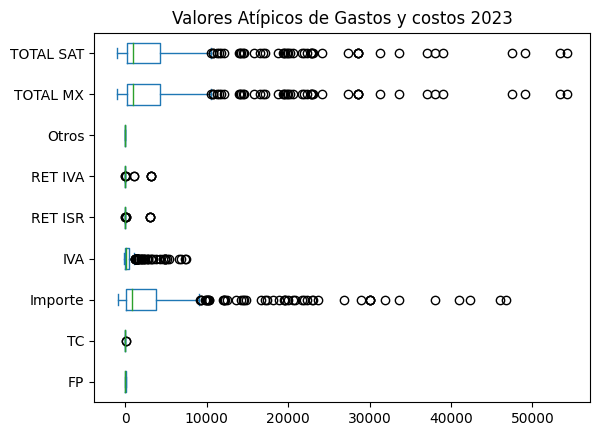

In [149]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data2023.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2023")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [150]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data2023
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             186.732206
Fecha                 NaT
IVA           3761.774707
Importe      26557.244156
Otros                 0.0
RET ISR        931.175004
RET IVA       1022.471745
TC               4.957143
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: object
Limite inferior permitido FP             -98.994171
Fecha                 NaT
IVA          -2766.954304
Importe     -18708.366775
Otros                 0.0
RET ISR       -869.142712
RET IVA       -947.124289
TC               -2.77403
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: object


<ipython-input-150-dc6e7df34b3d>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-150-dc6e7df34b3d>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-150-dc6e7df34b3d>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-150-dc6e7df34b3d>:4: FutureWarning: DataFrame.mean and DataFra

In [151]:
#Encontramos Ouliers del Dataframe
outliers= data2023[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-151-b2ec5c96af8f>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= data2023[(y>Limite_Superior)|(y<Limite_Inferior)]


,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data= data2023[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data

<ipython-input-152-f97c55f0e941>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data= data2023[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32,NaN,NaN,NaN


In [153]:
#Eliminamos columnas innecesarias
data2= data.drop(['Fecha'], axis=1)
data2

,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32,NaN,NaN,NaN


In [154]:
#Corroboramos valores nulos del dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

Folio          397
UUID           397
RFC            397
Proveedor      397
TIPO GASTO     397
Descripción    397
MP             397
FP               0
TC               2
Importe         13
IVA             13
RET ISR          4
RET IVA          6
Otros            0
TOTAL MX         9
TOTAL SAT        9
Tipo           397
Status         397
Poliza         397
dtype: int64

In [155]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32,NaN,NaN,NaN


In [156]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

Folio          397
UUID           397
RFC            397
Proveedor      397
TIPO GASTO     397
Descripción    397
MP             397
FP               0
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros            0
TOTAL MX         0
TOTAL SAT        0
Tipo           397
Status         397
Poliza         397
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [157]:
#Eliminamos columnas innecesarias
data1=data2023.copy()
data1= data1.drop(['Fecha'], axis=1)

In [158]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido FP             243.00
TC               1.00
Importe       9075.43
IVA           1120.00
RET ISR          0.00
RET IVA          0.00
Otros            0.00
TOTAL MX     10527.50
TOTAL SAT    10527.50
dtype: float64
Limite inferior permitido FP           -141.00
TC              1.00
Importe     -5259.05
IVA          -672.00
RET ISR         0.00
RET IVA         0.00
Otros           0.00
TOTAL MX    -6100.50
TOTAL SAT   -6100.50
dtype: float64


<ipython-input-158-6a81c83408ef>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-158-6a81c83408ef>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3


In [159]:
#Encontramos Outliers del Dataframe
outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

<ipython-input-159-01dbba553b9b>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr= data1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18071.52,NaN,NaN,NaN,NaN,18753.92,18753.92,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14472.32,NaN,NaN,NaN,NaN,14472.32,14472.32,NaN,NaN,NaN


In [160]:
#Obtenemos datos limpios del Dataframe
data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

<ipython-input-160-38d163ec8a02>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,NaN,0.0,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,682.40,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [161]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_iqr.isnull().sum()
valores_nulos

Folio          397
UUID           397
RFC            397
Proveedor      397
TIPO GASTO     397
Descripción    397
MP             397
FP               0
TC               2
Importe         50
IVA             49
RET ISR          9
RET IVA          9
Otros            0
TOTAL MX        46
TOTAL SAT       46
Tipo           397
Status         397
Poliza         397
dtype: int64

In [162]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data2_iqr=data_iqr.copy()
data2_iqr=data2_iqr.fillna(round(data_iqr.mean(),1))
data2_iqr

,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,176.80,0.0,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1521.50,682.40,0.0,0.0,0.0,1845.00,1845.00,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1521.50,0.00,0.0,0.0,0.0,1845.00,1845.00,NaN,NaN,NaN


In [163]:
# Unimos la columna FECHA con el dataframe
fecha=data2023['Fecha']
Datos_limpios_2023 = pd.concat([fecha, data2_iqr], axis=1)
Datos_limpios_2023

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,176.80,0.0,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1521.50,682.40,0.0,0.0,0.0,1845.00,1845.00,NaN,NaN,NaN
395,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1521.50,0.00,0.0,0.0,0.0,1845.00,1845.00,NaN,NaN,NaN


In [164]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios_2023.isnull().sum()
valores_nulos

Fecha            0
Folio          397
UUID           397
RFC            397
Proveedor      397
TIPO GASTO     397
Descripción    397
MP             397
FP               0
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros            0
TOTAL MX         0
TOTAL SAT        0
Tipo           397
Status         397
Poliza         397
dtype: int64

<Figure size 1500x800 with 0 Axes>

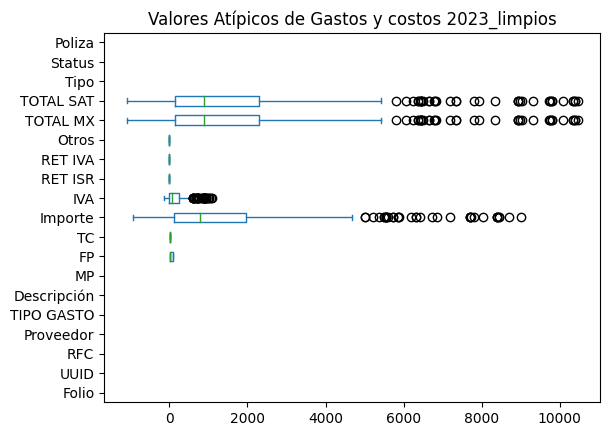

In [170]:
#Diagrama de caja o bigote de cada columna del dataframe limpio
fig = plt.figure(figsize =(15, 8))
Datos_limpios_2023.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y costos 2023_limpios")
plt.show()

In [165]:
#Convertir DataFrame a CSV
Datos_limpios_2023.to_csv("Gastos_Costos_2023_limpios.csv")

In [166]:
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("Gastos_Costos_2023_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>